In [39]:
from tictactoe import Board2D, TicTacToe 
from sim import simulate 
from agent import RandomAgent, MiniMaxAgent
from utils import plot_agent_results

import numpy as np
import pandas as pd

In [48]:
def dist(loc1, loc2):
    return np.square(loc1 - loc2).sum()

def dist_from_center(loc, board):
    center = np.asarray([board.shape[0]//2, board.shape[1]//2])
    return dist(np.asarray(loc), center)

def center_eval(node, player):
    board = node.state
    score = 0
    # i.e. gets the player we're evaluating the perspective of
    my_pieces = zip(*np.where(board.board == player))
    for loc in my_pieces:
        score -= dist_from_center(loc, board.board)
    return score

In [49]:
board = Board2D(board_size=3)

rand1 = RandomAgent(name='rand1')
agent = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)

In [50]:
result_standard = %timeit -n1 -r1 -o simulate(Board2D(board_size=3), rand1, agent, num_sims=400)

16.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [51]:
result_pruning = %timeit -n1 -r1 -o simulate(Board2D(board_size=3), rand1, agent_pruning, num_sims=400)

13.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
agent = MiniMaxAgent(center_eval, depth=1, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=1, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)
time1 = %timeit -n1 -r1 -o results_d1 = simulate(Board2D(board_size=3), agent, agent_pruning, num_sims=100)

1.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
agent = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)
time2 = %timeit -n1 -r1 -o results_d2 = simulate(Board2D(board_size=3), agent, agent_pruning, num_sims=100)

7.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [54]:
agent = MiniMaxAgent(center_eval, depth=3, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=3, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)
time3 = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), agent, agent_pruning, num_sims=100)

29.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


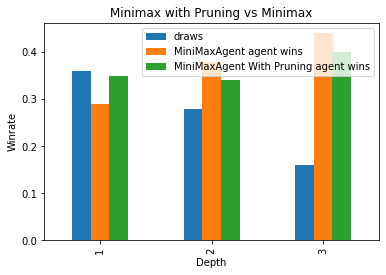

In [55]:
plot_agent_results([results_d1, results_d2, results_d3], agent, agent_pruning, x=[1, 2, 3], title = 'Minimax with Pruning vs Minimax', xlabel='Depth', ylabel='Winrate')

In [56]:
rand = RandomAgent(name='rand1')
agent = MiniMaxAgent(center_eval, depth=1, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=1, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)

time1 = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent, num_sims=100)
time1_ab = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent_pruning, num_sims=100)

709 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
761 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [57]:
rand = RandomAgent(name='rand1')
agent = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=2, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)

time2 = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent, num_sims=100)
time2_ab = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent_pruning, num_sims=100)

4.08 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.34 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [58]:
rand = RandomAgent(name='rand1')
agent = MiniMaxAgent(center_eval, depth=3, name = 'MiniMaxAgent', using_ab_pruning = False)
agent_pruning = MiniMaxAgent(center_eval, depth=3, name = 'MiniMaxAgent With Pruning', using_ab_pruning = True)

time3 = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent, num_sims=100)
time3_ab = %timeit -n1 -r1 -o results_d3 = simulate(Board2D(board_size=3), rand, agent_pruning, num_sims=100)

20.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [59]:
df_results_time = pd.DataFrame(columns = ['Minimax Time', 'Minimax Time with Pruning'])
df_results_time.loc[1] = ((time1.average, time1_ab.average))
df_results_time.loc[2] = ((time2.average, time2_ab.average))
df_results_time.loc[3] = ((time3.average, time3_ab.average))
df_results_time

,Minimax Time,Minimax Time with Pruning
1,0.709048,0.760817
2,4.078992,3.343972
3,20.496631,10.412442


<AxesSubplot:title={'center':'rand vs Minimax and rand vs Minimax with Pruning'}, xlabel='Depth', ylabel='Time in Seconds'>

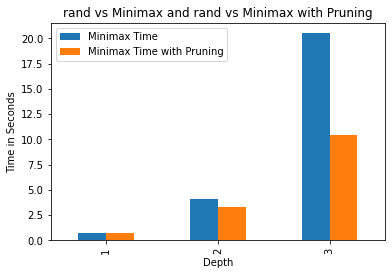

In [60]:
df_results_time.plot.bar(title = "rand vs Minimax and rand vs Minimax with Pruning", xlabel = "Depth", ylabel = "Time in Seconds")